In [11]:
import pyswarms as ps
import psopy
import math
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


In [12]:

# Import modules
import numpy as np

# Import sphere function as objective function

# Import backend modules
import pyswarms.backend as P
from pyswarms.backend.topology import Star

import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt
from pyswarms.utils.plotters.formatters import Mesher, Designer

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 22])

# Datframe

In [13]:
df = pd.read_csv('data/icr-nliq-computer-science.csv')
df = df.fillna(0)
df['ICR'] = df['ICR'].replace(0,0.01)
df

Institute  Articles  Articles w/ IC  \
0                            Yale University       139              38   
1                           Brown University       113              32   
2                          Boston University       135              37   
3                    University of Groningen       108              31   
4              Humboldt University of Berlin       113              29   
..                                       ...       ...             ...   
70                     University of Baghdad         8               2   
71  Hanoi University of Science & Technology        15              10   
72                 University of Puerto Rico        16              10   
73                         Atilim University        31               6   
74                      Universite de Bejaia        12               6   

    Total Citations  Parent Country Citations       ICR      NLIQ   Ranking  
0              2698                      1122  0.447413  0.584136         8  
1              2381                      1027  0.487884  0.568669        53  
2              4170                      1740  0.490636  0.582734        61  
3              1901                       308  0.490845  0.837980        73  
4              2930                       697  0.590844  0.762116        74  
..              ...                       ...       ...       ...       ...  
70              341                        15  0.473333  0.956012  801-1000  
71              160                         8  0.683347  0.950000  801-1000  
72              668                       161  0.441312  0.758982  801-1000  
73              416                        85  0.638889  0.795673  801-1000  
74              121                         0  0.428241  1.000000  801-1000  

[75 rows x 8 columns]

# CES function

In [14]:
class Q:
    def setparams(self,alpha=0.5,eta=1,K=0.306173,L=0.388889):
        self.K = K
        self.L = L
        self.alpha = alpha
        self.eta = eta
        
    def Q(self,rho):
        q1 = (self.alpha * self.K**rho) + (1 - self.alpha)*(self.L**rho)
        q = q1 ** (self.eta/rho)
        return q

    def Q1(self,rho):
        q = self.Q(rho)
        if (self.K**self.alpha)*(self.L**(1-self.alpha)) == 0:
            return 0
        q1_1 = q ** (-rho/self.eta) * math.log( (self.K**self.alpha)*(self.L**(1-self.alpha)) )
        if q == 0:
            return 0
        q1 = q1_1 / math.log(q)
        return q1
    
    def Q1_new(self,rho):
        r = (self.alpha * self.K**rho) + (1 - self.alpha)*(self.L**rho)
        q1 = self.K**(self.alpha*self.K**rho) * self.L**((1-self.alpha)*self.L**rho)
        res = ( (self.Q(rho)*self.eta) / (r*rho) ) * math.log(q1/(r**(r/rho)))
        return res
        
q =Q()
q.setparams(K=0.3061728395, L=0.38888888899999996,alpha=0.5)
def f(x):
    l,r = x.shape
    F = []
    for i in range(l):
        temp = []
        for j in range(r):
            #t = x[i][j]*math.sin(math.pi*x[i][j]*10)+1.0
            t = q.Q(x[i][j]) 
            #temp.append(t)
        F.append(t)
    #print(F)
    return np.array(F)

In [15]:
q.Q(0.10114881)

0.34531076902733304

# PSO optimization using inbuilt pySwarm

2020-06-01 10:18:25,975 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.511
2020-06-01 10:18:26,101 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5112250471210232, best pos: [0.00012062]


0.4474134631 0.5841363973


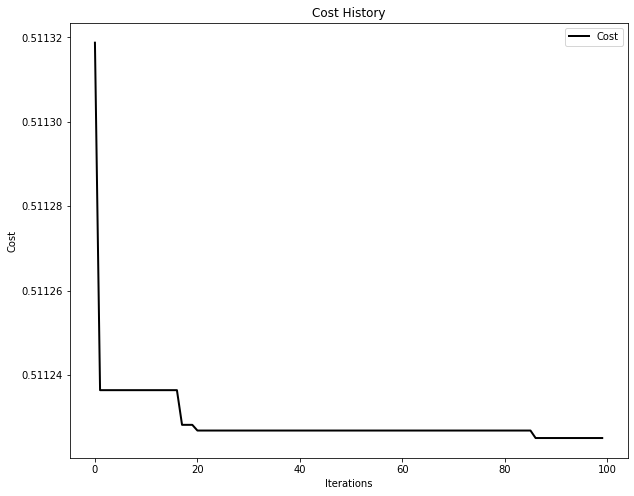

In [30]:
print(q.K,q.L)
q.setparams(K=df['ICR'][0],L=df['NLIQ'][0],alpha=0.5)
max_bound = 1.0 * np.ones(1)
min_bound = 0.0 * np.ones(1)
bounds = (min_bound, max_bound)
# Set-up optimizer
options = {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=1, options=options, bounds=bounds)
optimizer.optimize(f, iters=100)
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.savefig('cost.png')
plt.show()


2020-06-01 10:25:17,685 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2020-06-01 10:25:17,688 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x576 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/yy/1mdqj2p5327cp4kq5d1f69200000gp/T/tmppup1i9od/temp.m4v


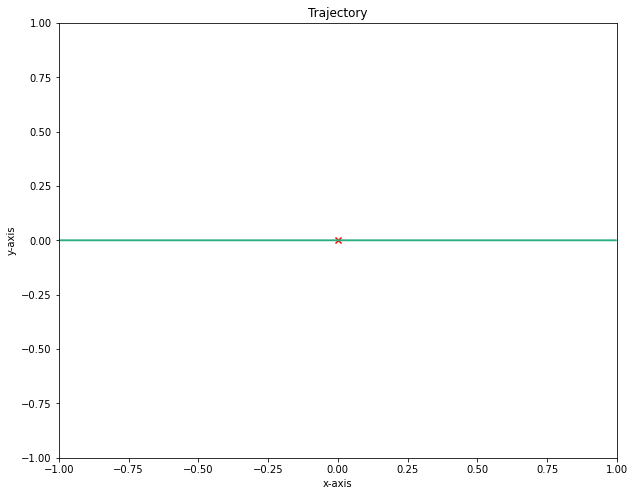

In [37]:
from IPython.display import HTML
%matplotlib inline
import matplotlib.animation# Plot the sphere function's mesh for better plots
m = Mesher(func=f)
# Adjust figure limits
d = Designer(
    #limits=[(-1,1), (-1,1), (-0.1,1)],
             label=['x-axis', 'y-axis', 'z-axis'])

animation2d = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

# Enables us to view it in a Jupyter notebook
HTML(animation2d.to_html5_video())

2020-06-01 10:21:34,166 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2020-06-01 10:21:34,169 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 720x576 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/yy/1mdqj2p5327cp4kq5d1f69200000gp/T/tmpz6c_4y92/temp.m4v


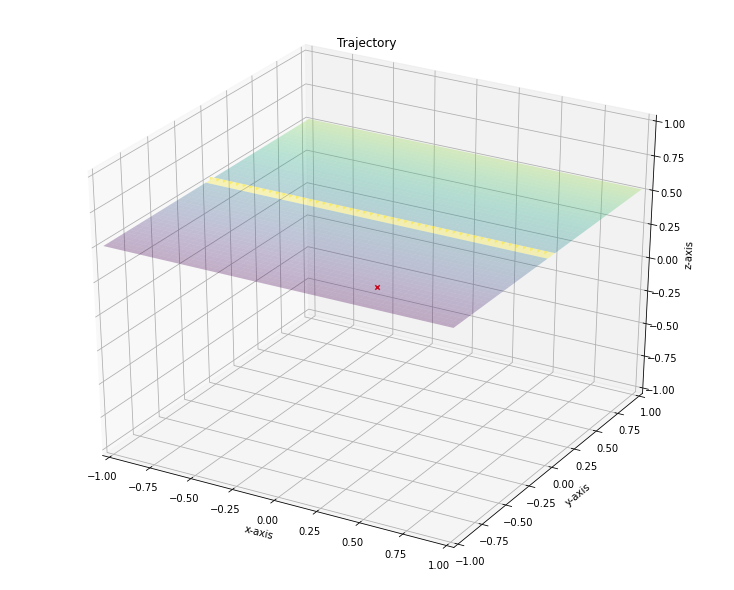

In [33]:
pos_history_3d = m.compute_history_3d(optimizer.pos_history)

from pyswarms.utils.plotters.formatters import Designer
d = Designer(label=['x-axis', 'y-axis', 'z-axis'])

# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,0))               # Mark minima

# Enables us to view it in a Jupyter notebook
HTML(animation3d.to_html5_video())

# Cost for each datapoint

(array([0.001]), array([0.1]))


In [32]:
def PSO(max_b,min_b,c1,c2,w,alpha):
    # Set constraints and options Internationality(rho>1)
    max_bound = max_b * np.ones(1)
    min_bound = min_b * np.ones(1)
    bounds = (min_bound,max_bound)
    options = {'c1': c1, 'c2': c2, 'w': w}
    print(bounds)

    costs = []
    positions = []
    K =[]
    L=[]
    for d in range(len(df))[:]:
        q.setparams(K=df['ICR'][d],L=df['NLIQ'][d],alpha=alpha)
        print(q.K,q.L)

        # Set-up optimizer
        optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=1, options=options,bounds =bounds)
        cost,pos = optimizer.optimize(f, iters=100)
        
        # Plotting 2D and 3D cost history
        # 2Dplot
        plot_cost_history(optimizer.cost_history)
        plt.savefig('cost_history/2D/'+str(max_b)+'>rho>'+str(min_b)+'/cost_2D_'+df['Institute'][d]+'.png')
        
        #3D plot
        m = Mesher(func=f,limits=[(-1,1), (-1,1)])
        # Adjust figure limits
        des = Designer(limits=[(-1,1), (-1,1), (-0.1,1)],label=['x-axis', 'y-axis', 'z-axis'])
        pos_history_3d = m.compute_history_3d(optimizer.pos_history) # preprocessing
        animation3d = plot_surface(pos_history=pos_history_3d,
                                   mesher=m, designer=des,
                                   mark=(0,0,0))   
        plt.savefig('cost_history/3D/'+str(max_b)+'>rho>'+str(min_b)+'/cost_3D_'+df['Institute'][d]+'.png')

        # Print and return cost and internationality score
        print('Cost: %f\nPosition%f'%(cost,pos))

        costs.append(cost)
        positions.append(pos[0])
    return costs,positions

2020-06-24 20:55:40,523 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.511
2020-06-24 20:55:40,630 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5112247438895215, best pos: [5.38834584e-05]


(array([0.]), array([1.]))
0.4474134631 0.5841363973


2020-06-24 20:55:54,247 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.527
2020-06-24 20:55:54,357 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5267303091460018, best pos: [0.00034092]


Cost: 0.511225
Position0.000054
0.4878838931 0.5686686266


2020-06-24 20:56:08,333 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.535
2020-06-24 20:56:08,429 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5347067941821696, best pos: [0.00054736]


Cost: 0.526730
Position0.000341
0.49063601869999995 0.5827338129


2020-06-24 20:56:22,607 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.641
2020-06-24 20:56:22,714 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6413669056105676, best pos: [0.00112449]


Cost: 0.534707
Position0.000547
0.49084515310000004 0.8379800104999999


2020-06-24 20:56:36,921 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.671
2020-06-24 20:56:37,020 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6710410086254828, best pos: [0.00063195]


Cost: 0.641367
Position0.001124
0.5908436531 0.762116041


2020-06-24 20:56:51,479 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.558
2020-06-24 20:56:51,574 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5578787616025122, best pos: [0.00091314]


Cost: 0.671041
Position0.000632
0.5554567900999999 0.560311284


2020-06-24 20:57:06,266 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.582
2020-06-24 20:57:06,365 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5823276009471456, best pos: [0.0015878]


Cost: 0.557879
Position0.000913
0.4646057237 0.7298187809000001


2020-06-24 20:57:20,773 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.704
2020-06-24 20:57:20,872 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7039656103411662, best pos: [0.00030417]


Cost: 0.582328
Position0.001588
0.5716947328 0.8668280872


2020-06-24 20:57:35,048 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.556
2020-06-24 20:57:35,146 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5557298142912871, best pos: [0.00132658]


Cost: 0.703966
Position0.000304
0.5074962699000001 0.6085409253


2020-06-24 20:57:49,496 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.569
2020-06-24 20:57:49,595 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5692967562839978, best pos: [0.00052206]


Cost: 0.555730
Position0.001327
0.4037449775 0.8026819923


2020-06-24 20:58:04,315 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.57
2020-06-24 20:58:04,415 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5703376842774851, best pos: [0.00046507]


Cost: 0.569297
Position0.000522
0.4722488996 0.6887886598


/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, 1, figsize=designer.figsize)
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=designer.figsize)
2020-06-24 20:58:18,783 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9

Cost: 0.570338
Position0.000465
0.5642211965 0.871850252


/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, 1, figsize=designer.figsize)
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=designer.figsize)
2020-06-24 20:58:33,411 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9

Cost: 0.701369
Position0.000074
0.5377777778 0.5471698113


/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, 1, figsize=designer.figsize)
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=designer.figsize)
2020-06-24 20:58:48,580 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9

Cost: 0.542453
Position0.000574
0.484691615 0.9252465483


/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, 1, figsize=designer.figsize)
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=designer.figsize)
2020-06-24 20:59:03,135 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9

Cost: 0.669689
Position0.000520
0.46719743700000005 0.8469184891


/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, 1, figsize=designer.figsize)
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=designer.figsize)
2020-06-24 20:59:17,798 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9

Cost: 0.629059
Position0.001057
0.5684712516 0.8235002479000001


/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:121: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = plt.subplots(1, 1, figsize=designer.figsize)
/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/pyswarms/utils/plotters/plotters.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=designer.figsize)


KeyboardInterrupt: 

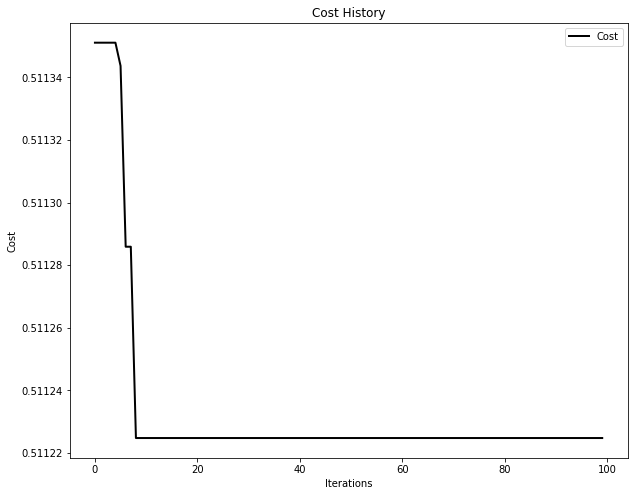

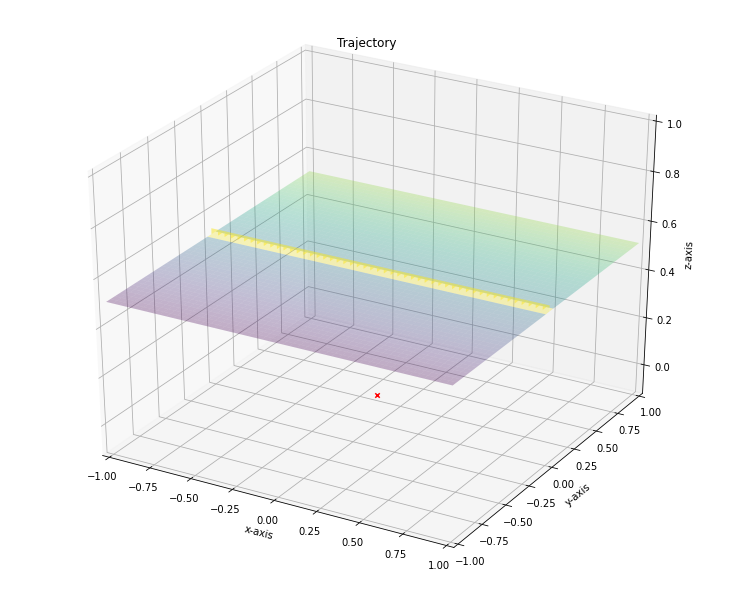

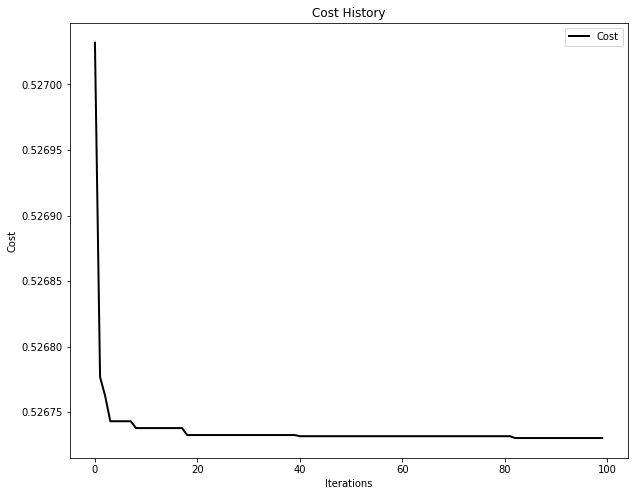

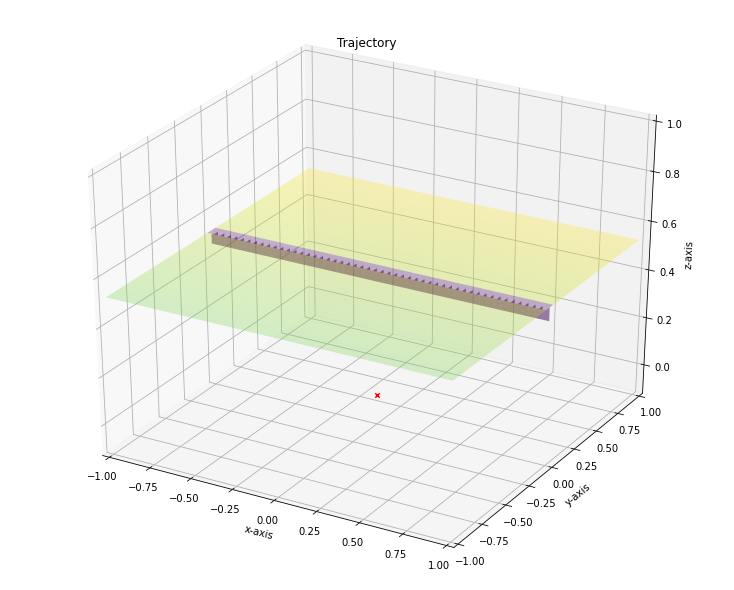

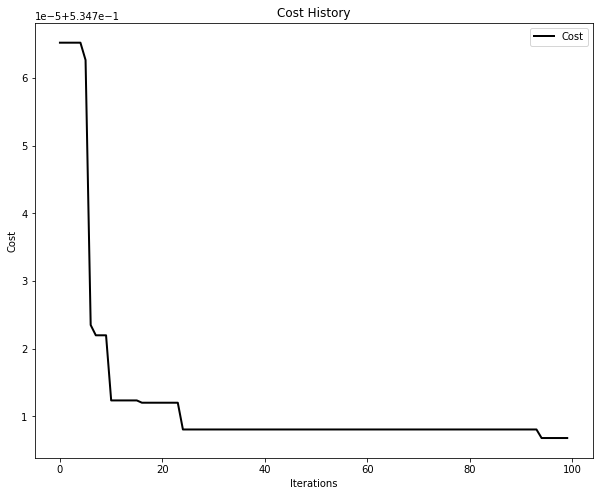

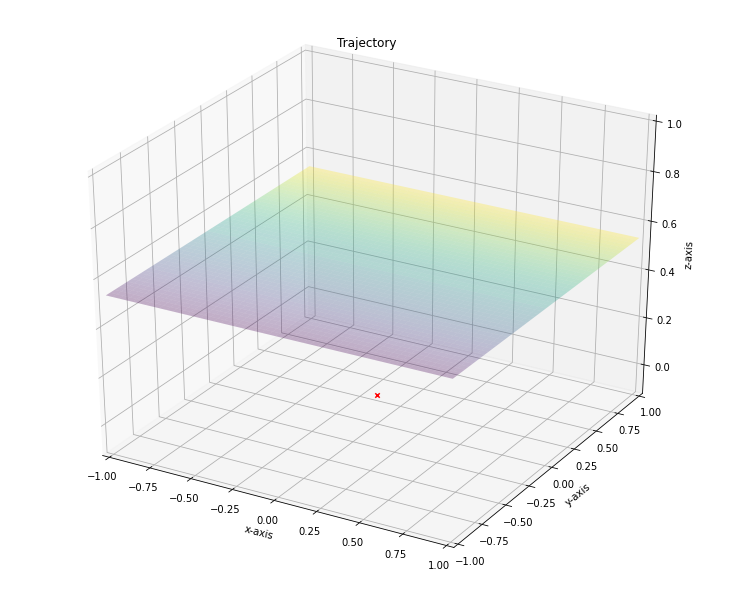

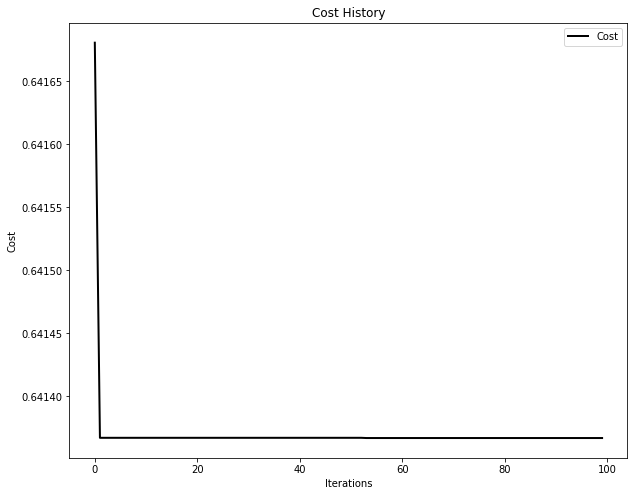

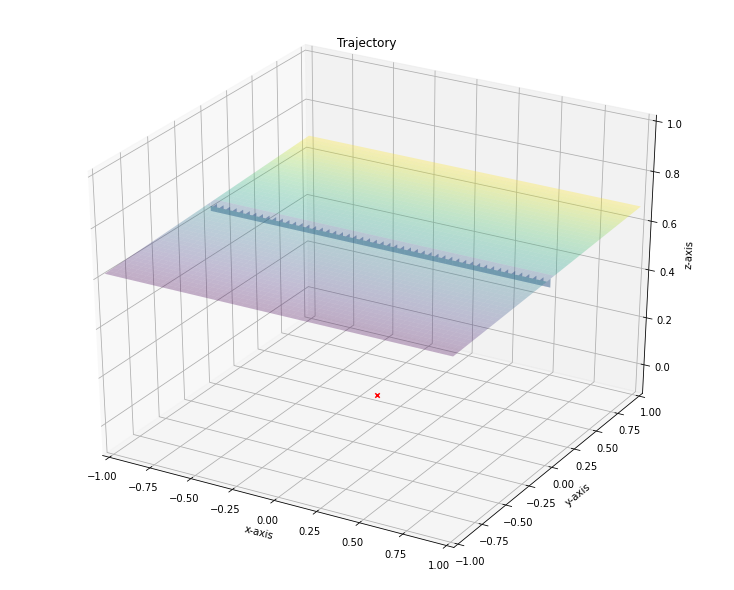

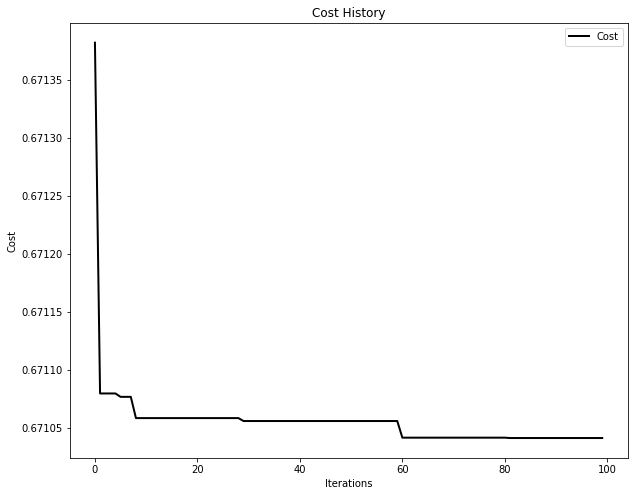

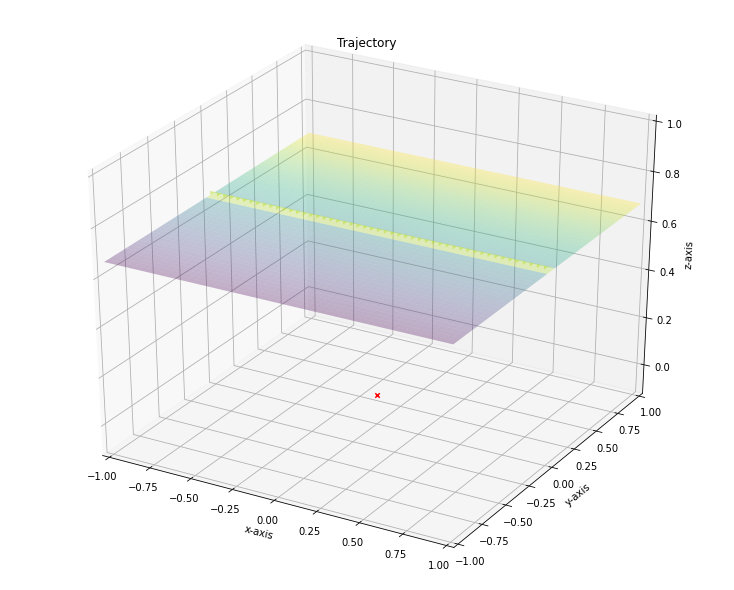

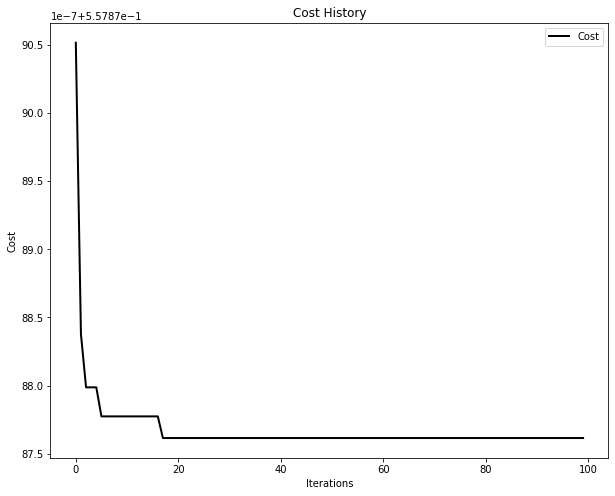

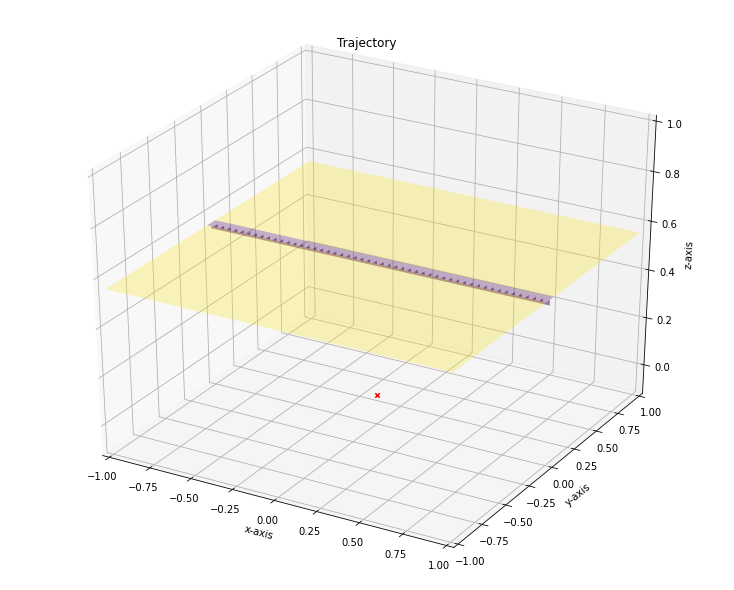

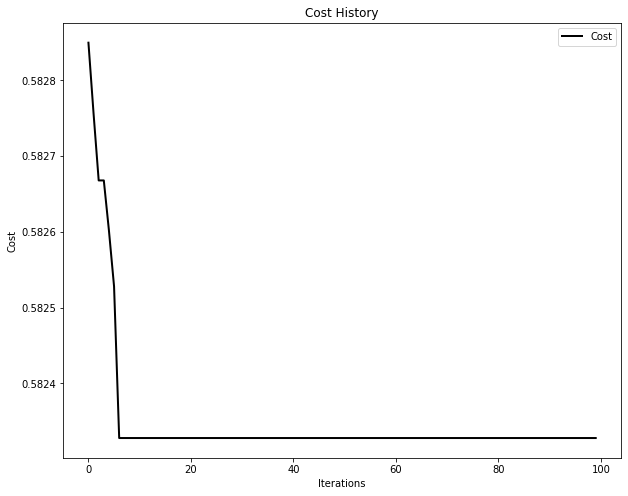

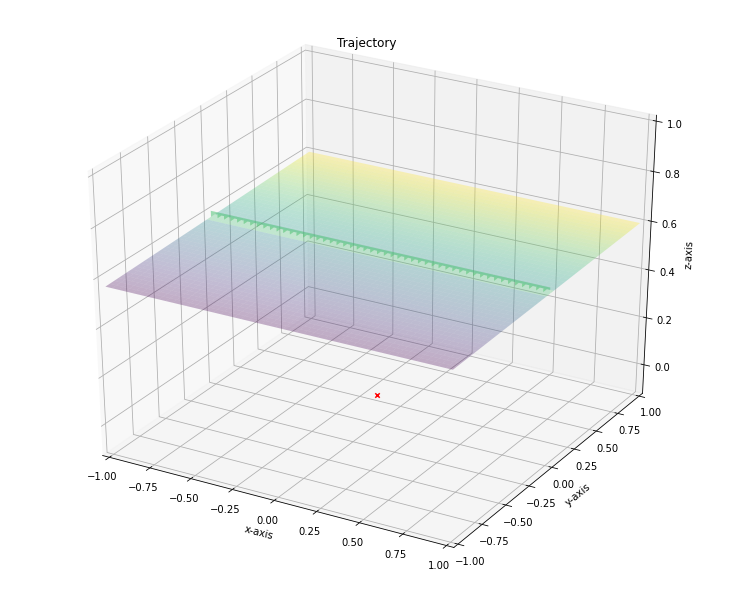

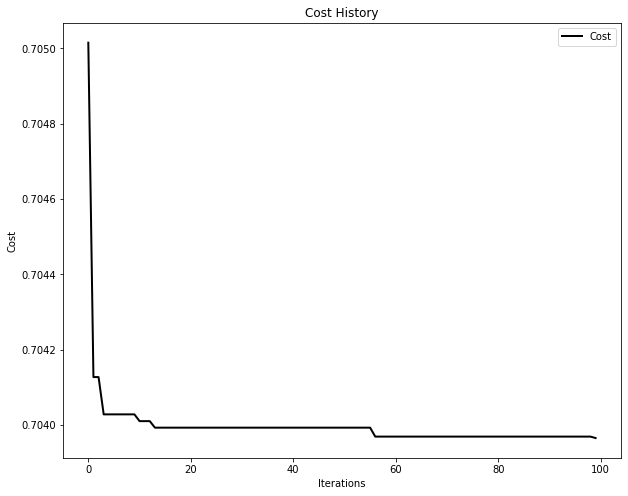

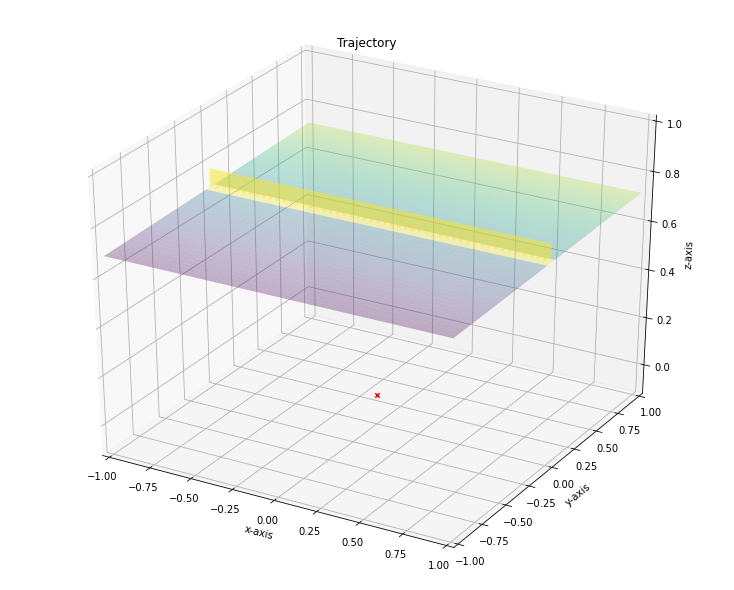

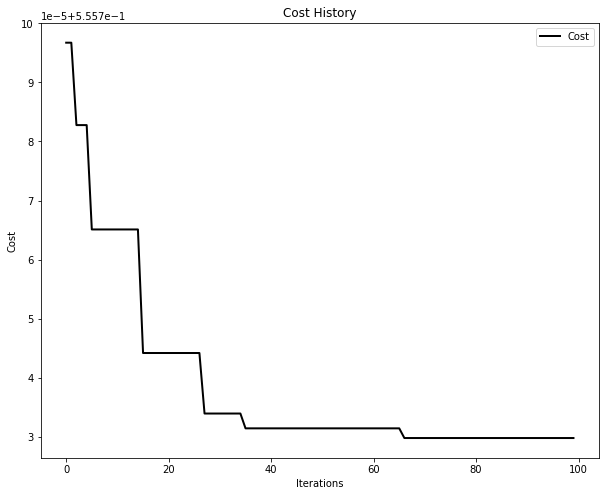

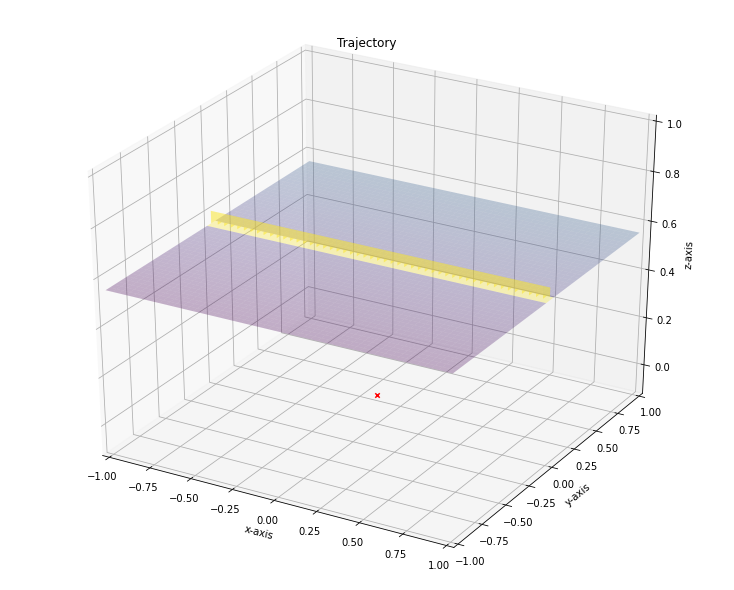

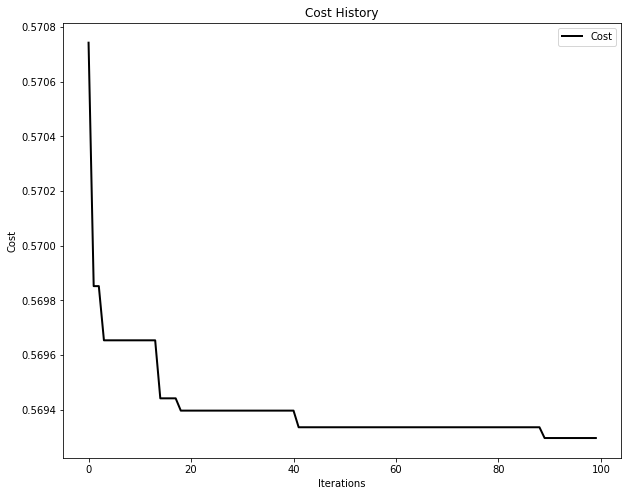

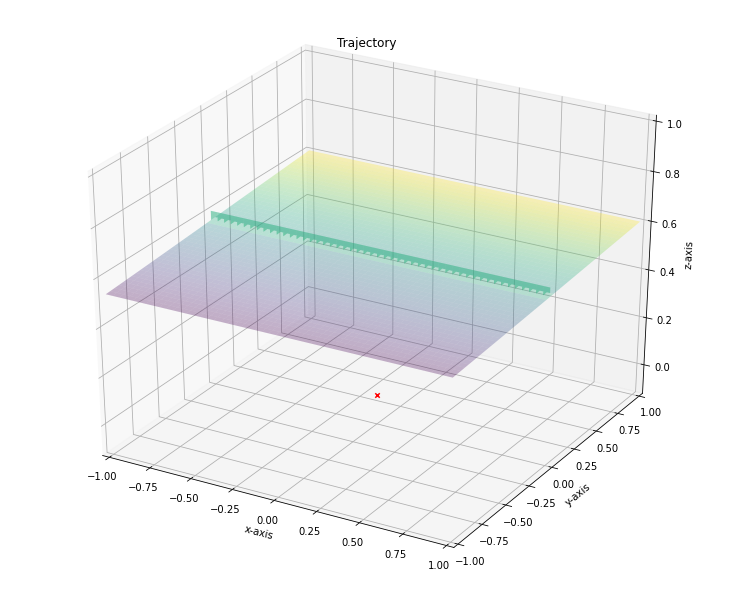

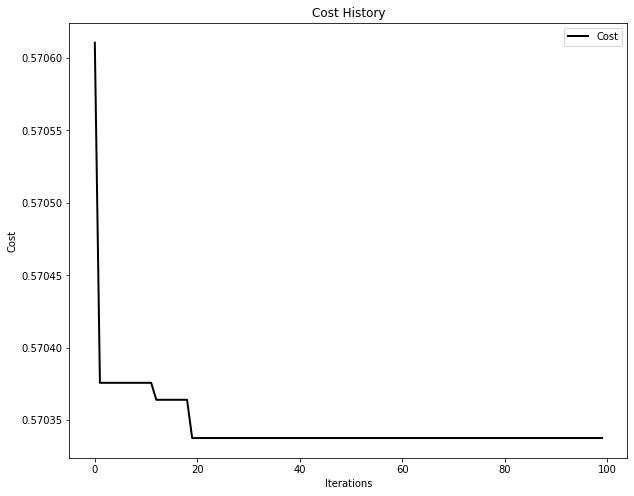

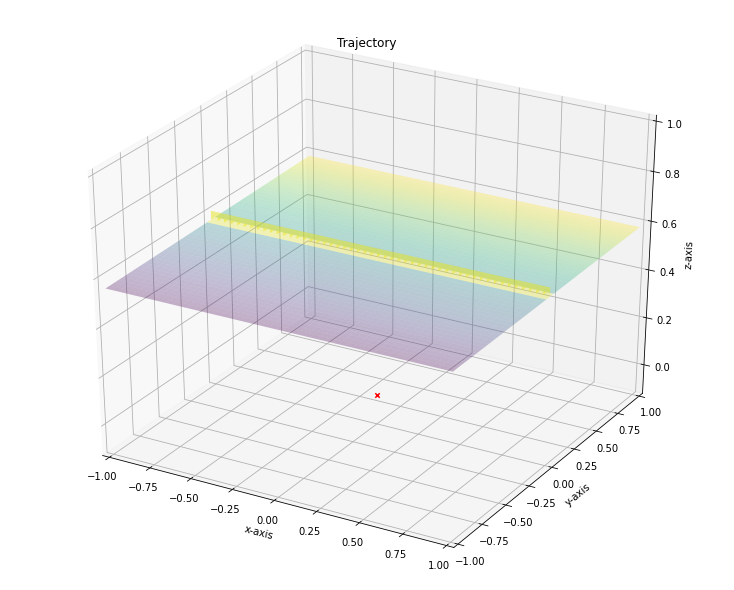

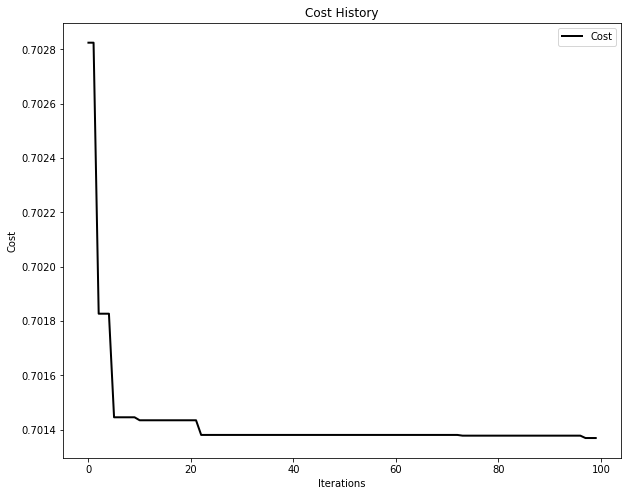

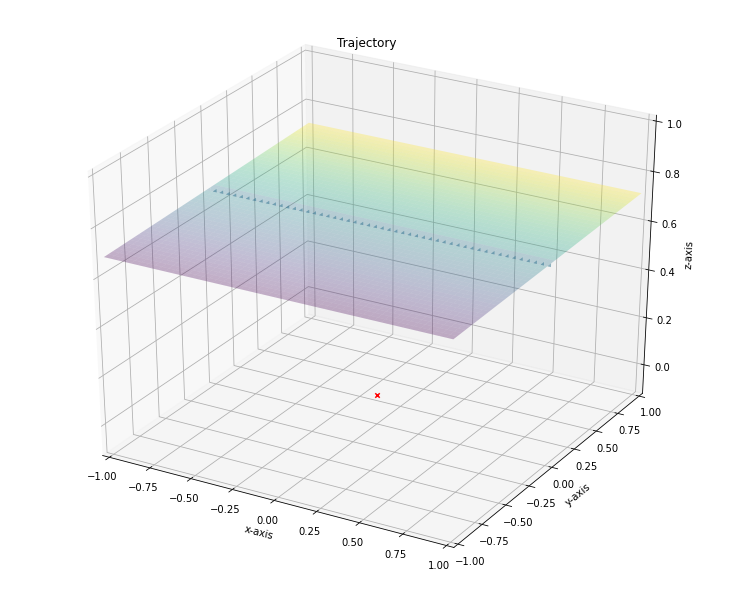

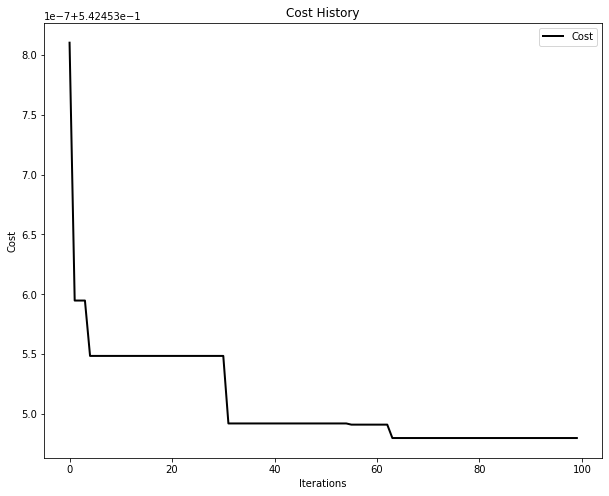

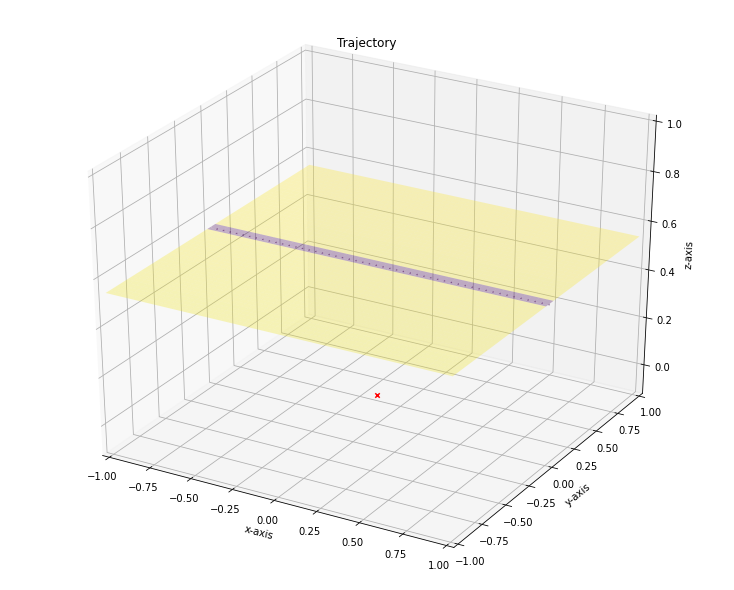

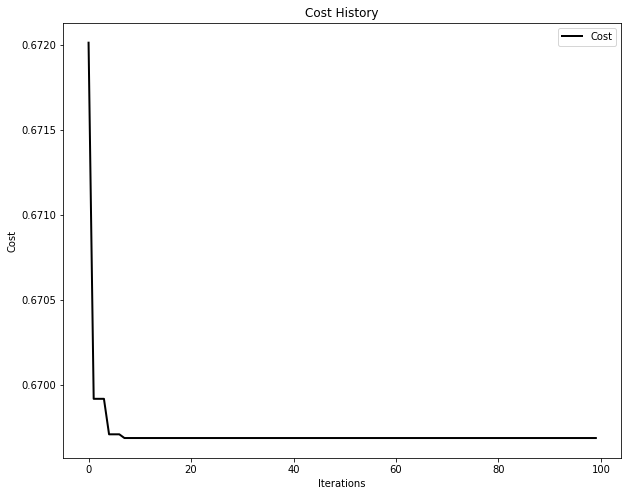

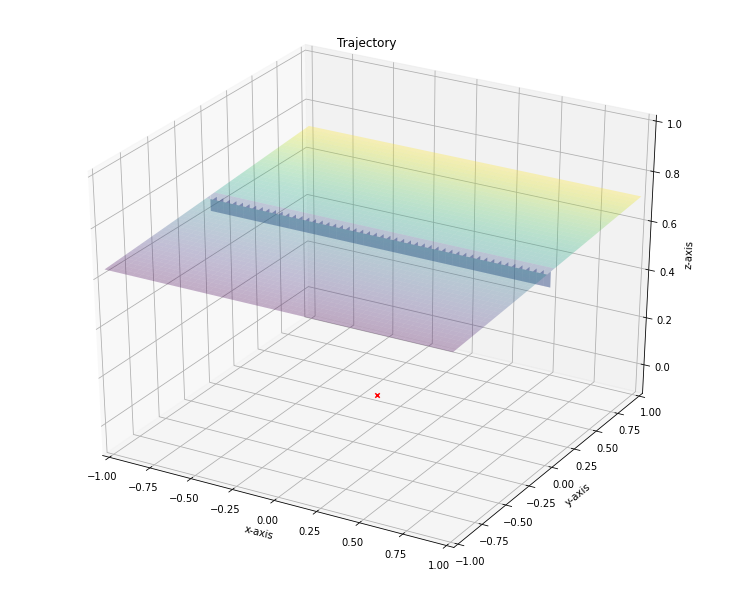

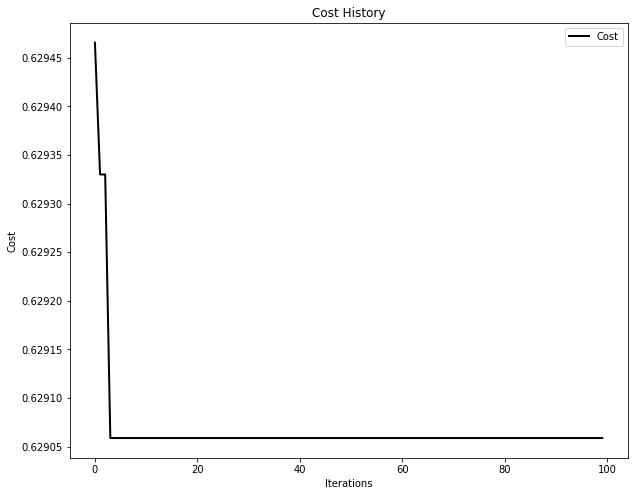

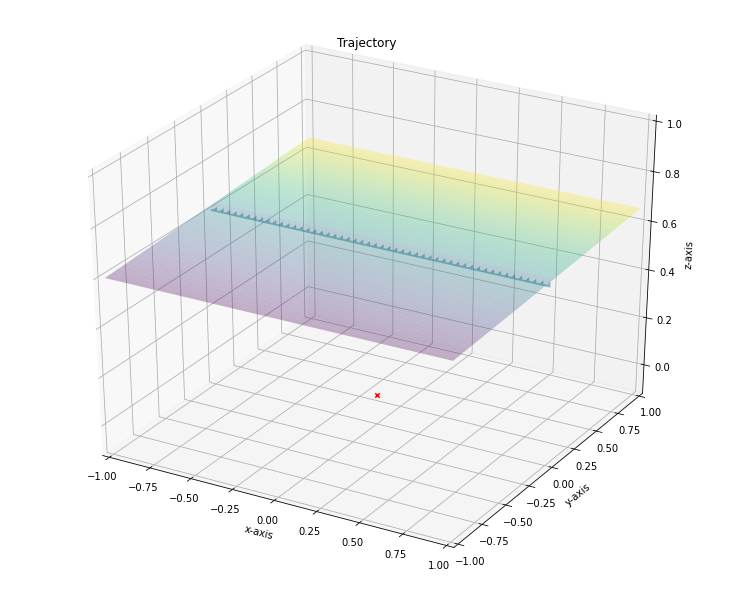

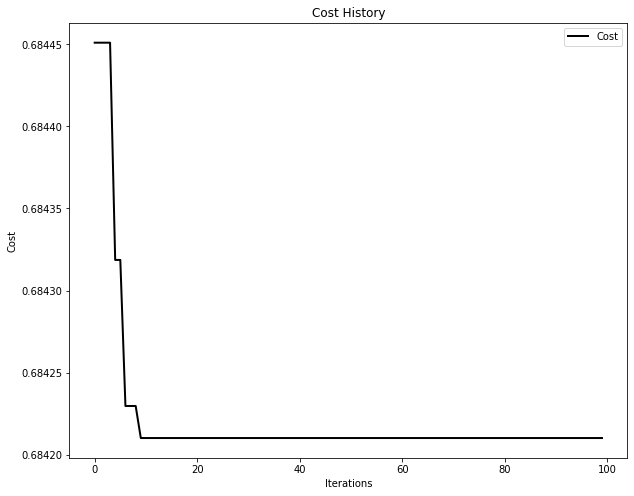

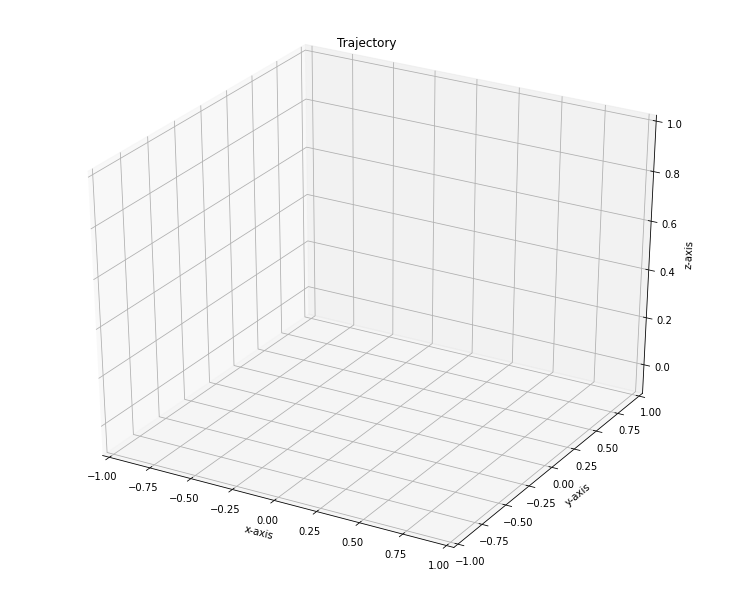

In [33]:
c1 = 0.6
c2 = 0.3
w = 0.9
alpha =0.5

# 0-1
c,p = PSO(1,0,c1,c2,w,alpha)
df['1>rho>0'] = p
df['Internationality(1>rho>0)'] = c

# 0.001-0.1
c,p = PSO(0.1,0.001,c1,c2,w,alpha)
df['0.1>rho>0.001'] = p
df['Internationality(0.1>rho>0.001)'] = c

# 0.9-0.99
c,p = PSO(0.99,0.9,c1,c2,w,alpha)
df['0.99>rho>0.9'] = p
df['Internationality(0.99>rho>0.9)'] = c

# 0.101-0.9
c,p = PSO(0.9,0.101,c1,c2,w,alpha)
df['0.9>rho>0.101'] = p
df['Internationality(0.9>rho>0.101)'] = c

# >1
c,p = PSO(999999,1,c1,c2,w,alpha)
df['rho>1'] = p
df['Internationality(rho>1)'] = c

df.to_csv('result/result_alpha_'+str(alpha)+'.csv',index=False)

In [34]:
df

Institute  Articles  Articles w/ IC  \
0                            Yale University       139              38   
1                           Brown University       113              32   
2                          Boston University       135              37   
3                    University of Groningen       108              31   
4              Humboldt University of Berlin       113              29   
..                                       ...       ...             ...   
70                     University of Baghdad         8               2   
71  Hanoi University of Science & Technology        15              10   
72                 University of Puerto Rico        16              10   
73                         Atilim University        31               6   
74                      Universite de Bejaia        12               6   

    Total Citations  Parent Country Citations       ICR      NLIQ   Ranking  \
0              2698                      1122  0.447413  0.584136         8   
1              2381                      1027  0.487884  0.568669        53   
2              4170                      1740  0.490636  0.582734        61   
3              1901                       308  0.490845  0.837980        73   
4              2930                       697  0.590844  0.762116        74   
..              ...                       ...       ...       ...       ...   
70              341                        15  0.473333  0.956012  801-1000   
71              160                         8  0.683347  0.950000  801-1000   
72              668                       161  0.441312  0.758982  801-1000   
73              416                        85  0.638889  0.795673  801-1000   
74              121                         0  0.428241  1.000000  801-1000   

     1>rho>0  Internationality(1>rho>0)  0.1>rho>0.001  \
0   0.000112                   0.511225       0.001052   
1   0.000235                   0.526730       0.001027   
2   0.001410                   0.534709       0.001005   
3   0.000875                   0.641361       0.001044   
4   0.000125                   0.671038       0.001006   
..       ...                        ...            ...   
70  0.000816                   0.672724       0.001020   
71  0.000089                   0.805718       0.001007   
72  0.000475                   0.578757       0.001060   
73  0.000009                   0.712984       0.001005   
74  0.000353                   0.654422       0.001103   

    Internationality(0.1>rho>0.001)  0.99>rho>0.9  \
0                          0.511229      0.900004   
1                          0.526731      0.900026   
2                          0.534708      0.900071   
3                          0.641365      0.900088   
4                          0.671043      0.900002   
..                              ...           ...   
70                         0.672733      0.900022   
71                         0.805728      0.900013   
72                         0.578770      0.900100   
73                         0.712989      0.900009   
74                         0.654466      0.900058   

    Internationality(0.99>rho>0.9)  0.9>rho>0.101  \
0                         0.515320       0.101495   
1                         0.528122       0.101305   
2                         0.536487       0.101031   
3                         0.662117       0.101730   
4                         0.675936       0.101049   
..                             ...            ...   
70                        0.710506       0.101083   
71                        0.815580       0.101667   
72                        0.598019       0.101119   
73                        0.716852       0.101364   
74                        0.708214       0.101081   

    Internationality(0.9>rho>0.101)          rho>1  Internationality(rho>1)  
0                          0.511686  933144.395719                 0.000000  
1                          0.526886  769854.100459                 0.0

In [23]:
df.to_csv('result/result_alpha_0.5.csv',index=False)

In [460]:
df[df['Institute'].isin(['Simon Fraser University','Indian Institute of Technology (IIT) - Kharagpur'])]

Institute  Articles  \
22  Indian Institute of Technology (IIT) - Kharagpur        32   
32                           Simon Fraser University        66   

    Articles w/ IC  Total Citations  Parent Country Citations       ICR  \
22               8              262                        49  0.463333   
32              15              593                        97  0.462083   

        NLIQ  Ranking      cost       rho  Internationality(1>rho>0)  \
22  0.812977      0.0  0.768536  0.000730                   0.768531   
32  0.836425     60.0  0.788240  0.000277                   0.788256   

    Internationality(0.1>rho>0.001)  Internationality(0.99>rho>0.9)  \
22                         0.768540                        0.777186   
32                         0.788249                        0.798060   

    Internationality(0.9>rho>0.101)  Internationality(rho>1)  \
22                         0.769618                      0.0   
32                         0.789484                      0.0   

    Internationality(1rho>0)  
22                  0.768536  
32                  0.788240

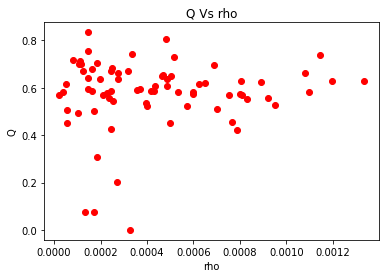

In [24]:
temp =df
temp = temp.sort_values(by=['1>rho>0'])
#print(temp)
x = temp['1>rho>0']
y = temp['Internationality(1>rho>0']

fig=plt.figure()
#ax=fig.add_axes([0,0,1,1])
plt.scatter(x, y, color='r')

plt.xlabel('rho')
plt.ylabel("Q")
plt.title('Q Vs rho')
plt.savefig('qVSrho.png')



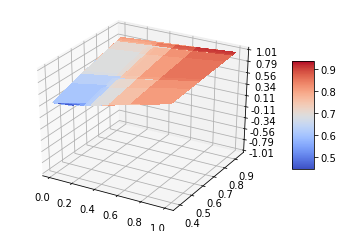

In [469]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = temp['ICR']
#X = np.arange(-5, 5, 1)
Y = temp['NLIQ']
#Y = np.arange(-5, 5, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
print()
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Graphs for different ranges of rho

In [410]:
r = (0.00001,1)

In [472]:
i = r[0]
rho = []
inter = []
Q1 =[]
Q1_new=[]
k=df['ICR'][4]
l=df['NLIQ'][4]
q.setparams(K=k,L=l)
while i<r[1]:
    inter.append(q.Q(i))
    Q1.append(q.Q1(i))
    Q1_new.append(q.Q1_new(i))
    rho.append(i)
    i+=.001

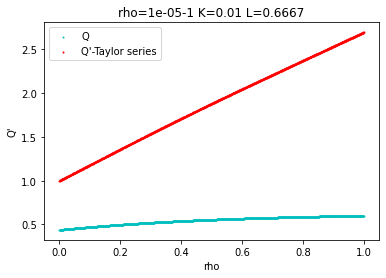

In [473]:
x = rho
y = inter

fig=plt.figure()
#ax=fig.add_axes([0,0,1,1])
plt.scatter(x, y, color='c',s=1,label='Q')
plt.scatter(x, Q1, color='r',s=1,label='Q\'-Taylor series')
#plt.scatter(x, Q1_new, color='g',s=1,label='Q\'-Chain Rule')
plt.xlabel('rho')
plt.ylabel("Q\'")
plt.legend()
plt.title('rho='+str(r[0])+'-'+str(r[1]) +' K='+ str(round(k,4))+' L='+ str(round(l,4)))
plt.savefig('graphs/'+str(round(k,2))+'-'+str(round(l,2))+'.png')

In [454]:
temp

Institute  Articles  \
9                                   Auburn University         7   
35                     University of British Columbia        85   
49                                  Yonsei University        41   
10                     Australian National University        56   
23      Indian Institute of Technology (IIT) - Madras        37   
20      Indian Institute of Technology (IIT) - Bombay        11   
36                            University of Edinburgh        83   
12          Benemerita Universidad Autonoma de Puebla        15   
6                                   Ankara University         3   
11                  Babes Bolyai University from Cluj         7   
40                               University of Ottawa        39   
34     State University of New York (SUNY) Binghamton        13   
17           Ecole Polytechnique Federale de Lausanne       268   
44                  University of Southern Queensland         2   
22   Indian Institute of Technology (IIT) - Kharagpur        32   
18     Indian Institute of Science (IISC) - Bangalore        39   
8                            Arizona State University        80   
37                               University of Guelph        45   
3                               Alexandria University         5   
16                                 Cornell University       121   
38                             University of Michigan       218   
46                              University of Toronto       200   
30                                     PES University         2   
7                            Aoyama Gakuin University        15   
32                            Simon Fraser University        66   
19  Indian Institute of Technology (IIT BHU) - Var...         9   
0              AGH University of Science & Technology        29   
47                             University of Waterloo        91   
4                                    Amity University         3   
31                             RWTH Aachen University        59   
43                  University of Southern California       173   
1                                 Al Azhar University         5   
13  Birla Institute of Technology and Science Pila...         9   
42                              University of Salford        24   
28         National Institute of Technology Karnataka         2   
33                                  Sogang University        19   
48                                    Yale University        84   
15                                Columbia University        72   
27                                  McGill University       103   
45                                University of Tokyo       390   
2        Al-Imam Muhammad Ibn Saud Islamic University         2   
14                          Colorado State University        25   
26                                 Manipal University         5   
25                           Johns Hopkins University       130   
21       Indian Institute of Technology (IIT) - Delhi        25   
29                    North Carolina State University        31   
41                         University of Pennsylvania       222   
39                             University of Montreal        56   
5                          Amrita Vishwa Vidyapeetham         4   
24     Indian Institute of Technology (IIT) - Roorkee        22   

    Articles w/ IC  Total Citations  Parent Country Citations       ICR  \
9                1               52                         7  1.000000   
35              26             1642                       147  0.375978   
49               5              250                        66  0.243333   
10              20             1901                       137  0.492913   
23               7              329                        53  0.557143   
20               0              230                        20  0.010000   
36              34              860                        51  0.280757   
12               2        